# Named Entity Recognition (NER) Comparison: spaCy vs Stanza

This notebook demonstrates how to extract named entities from sentences using two different NLP libraries: **spaCy** and **Stanza**. We use a token-level test set and compare the results of both systems.

## 1. Load the NER Test Data

We load the token-level NER test set, which contains columns for sentence ID, token ID, token, and BIO NER tag.

In [39]:
import pandas as pd # Use pandas to read the dataset
ner_test = pd.read_csv(r'NER-test.tsv', sep="\t") # Read the dataset
ner_test.head() # Look at the first 5 rows to ensure the data is read correctly

,sentence_id,token_id,token,BIO_NER_tag
0,0,0,If,O
1,0,1,you're,O
2,0,2,visiting,O
3,0,3,Paris,B-LOCATION
4,0,4,",",O


## 2. Reconstruct Sentences

Since the data is tokenized, we group tokens by `sentence_id` to reconstruct the full sentences for NER processing.

In [40]:
sentences = ner_test.groupby('sentence_id')['token'].apply(lambda tokens: ' '.join(tokens)).reset_index() # Group the data by sentence ID and join the tokens into a single sentence
sentences.columns = ['sentence_id', 'sentence'] # Rename the columns

## 3. Import and Initialize NLP Libraries

We import and initialize the spaCy and Stanza pipelines for English. These will be used to extract named entities from each sentence.

In [41]:
import spacy
import stanza

In [42]:
nlp_spacy = spacy.load("en_core_web_sm") # Load the English language model

In [43]:
stanza.download("en") # Download the English language model
nlp_stanza = stanza.Pipeline("en") # Load the English language model

2025-05-27 16:31:11 INFO: Downloaded file to C:\Users\munzu\stanza_resources\resources.json
2025-05-27 16:31:11 INFO: Downloading default packages for language: en (English) ...
2025-05-27 16:31:12 INFO: File exists: C:\Users\munzu\stanza_resources\en\default.zip
2025-05-27 16:31:13 INFO: Finished downloading models and saved to C:\Users\munzu\stanza_resources
2025-05-27 16:31:13 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-05-27 16:31:14 INFO: Downloaded file to C:\Users\munzu\stanza_resources\resources.json
2025-05-27 16:31:14 INFO: Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

2025-05-27 16:31:14 INFO: Using device: cpu
2025-05-27 16:31:14 INFO: Loading: tokenize
2025-05-27 16:31:14 INFO: Loading: mwt
2025-05-27 16:31:14 INFO: Loading: pos
2025-05-27 16:31:16 INFO: Loading: lemma
2025-05-27 16:31:16 INFO: Loading: constituency
2025-05-27 16:31:16 INFO: Loading: depparse
2025-05-27 16:31:17 INFO: Loading: sentiment
2025-05-27 16:31:17 INFO: Loading: ner

## 4. Define Entity Extraction Functions

We define helper functions to extract entities from a sentence using each library. The functions return a list of (entity text, entity label) pairs.

In [44]:
def extract_entities_spacy(text): # Function to extract entities using spaCy 
    doc = nlp_spacy(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

In [45]:
def extract_entities_stanza(text): # Function to extract entities using stanza
    doc = nlp_stanza(text)
    return [(ent.text, ent.type) for sent in doc.sentences for ent in sent.ents]

## 5. Apply NER Systems

We apply both spaCy and Stanza NER to each sentence and store the results in new columns.

In [46]:
sentences['spacy_entities'] = sentences['sentence'].apply(extract_entities_spacy) # Apply the spaCy function to each sentence
sentences['stanza_entities'] = sentences['sentence'].apply(extract_entities_stanza) # Apply the stanza function to each sentence

## 6. Display and Compare Results

We display the sentences alongside the entities extracted by each system. This allows for direct comparison and further analysis.

In [47]:
for idx, row in sentences.iterrows():
    print(f"Sentence: {row['sentence']}\n") # Print the sentence
    print("spaCy entities:")
    for ent in row['spacy_entities']: # Iterate over the spaCy entities and print them
        print(f"  {ent[0]} ({ent[1]})")
    print("Stanza entities:")
    for ent in row['stanza_entities']: # Iterate over the stanza entities and print them
        print(f"  {ent[0]} ({ent[1]})")
    print("-" * 60)

Sentence: If you're visiting Paris , make sure to see the Louvre , as they exhibit the Mona Lisa !

spaCy entities:
  Paris (GPE)
  Louvre (PERSON)
  the Mona Lisa (WORK_OF_ART)
Stanza entities:
  Paris (GPE)
  Louvre (FAC)
  the Mona Lisa (PERSON)
------------------------------------------------------------
Sentence: Amazon , Google and Meta control a huge share of the technology market globally .

spaCy entities:
  Amazon (ORG)
  Google (ORG)
  Meta (ORG)
Stanza entities:
  Amazon (ORG)
  Google (ORG)
  Meta (ORG)
------------------------------------------------------------
Sentence: Did you hear Pharoah Sanders recorded an album with Floating Points ?

spaCy entities:
  Pharoah Sanders (PERSON)
  Floating Points (WORK_OF_ART)
Stanza entities:
  Pharoah Sanders (PERSON)
  Floating Points (WORK_OF_ART)
------------------------------------------------------------
Sentence: Madvillainy is still my favourite MF DOOM record .

spaCy entities:
Stanza entities:
  Madvillainy (PERSON)
------

## 7. Direct Comparison of spaCy and Stanza Results

The following sections present a direct comparison between the named entity recognition results produced by spaCy and Stanza. We will analyze agreements, disagreements, and unique findings from each system side by side.

A table containing all the results of the models side by side

In [48]:
# Pivot the comparison DataFrame to see spaCy and Stanza side by side
pivot_df = comparison_df.pivot_table(
    index=['sentence_id', 'sentence', 'entity'],
    columns='system',
    values='label',
    aggfunc='first'
).reset_index()

pd.set_option('display.max_colwidth', None)
display(pivot_df)

system,sentence_id,sentence,entity,Stanza,spaCy
0,0,"If you're visiting Paris , make sure to see the Louvre , as they exhibit the Mona Lisa !",Louvre,FAC,PERSON
1,0,"If you're visiting Paris , make sure to see the Louvre , as they exhibit the Mona Lisa !",Paris,GPE,GPE
2,0,"If you're visiting Paris , make sure to see the Louvre , as they exhibit the Mona Lisa !",the Mona Lisa,PERSON,WORK_OF_ART
3,1,"Amazon , Google and Meta control a huge share of the technology market globally .",Amazon,ORG,ORG
4,1,"Amazon , Google and Meta control a huge share of the technology market globally .",Google,ORG,ORG
5,1,"Amazon , Google and Meta control a huge share of the technology market globally .",Meta,ORG,ORG
6,2,Did you hear Pharoah Sanders recorded an album with Floating Points ?,Floating Points,WORK_OF_ART,WORK_OF_ART
7,2,Did you hear Pharoah Sanders recorded an album with Floating Points ?,Pharoah Sanders,PERSON,PERSON
8,3,Madvillainy is still my favourite MF DOOM record .,Madvillainy,PERSON,NaN
9,4,"My friend Kevin just finished watching Succession , and won't stop talking about Kieran Culkin 's performance .",Kevin,PERSON,PERSON


The number of entities found by each model

In [49]:
# Count entities found by each model
n_spacy = comparison_df[comparison_df['system'] == 'spaCy'].shape[0]
n_stanza = comparison_df[comparison_df['system'] == 'Stanza'].shape[0]

print(f"Entities found by spaCy: {n_spacy}")
print(f"Entities found by Stanza: {n_stanza}")

Entities found by spaCy: 32
Entities found by Stanza: 32


The number of entities with same or different label

In [50]:
# Entities found by both systems (side-by-side comparison)
filtered = pivot_df.dropna(subset=['spaCy', 'Stanza'], how='all')
agreement = filtered[filtered['spaCy'] == filtered['Stanza']]
disagreement = filtered[filtered['spaCy'] != filtered['Stanza']]

print(f"Entities with SAME label: {len(agreement)}")
print(f"Entities with DIFFERENT label: {len(disagreement)}")

Entities with SAME label: 20
Entities with DIFFERENT label: 20


Uniqueness of entities

In [51]:
# Entities found only by spaCy
only_spacy = pivot_df[(pivot_df['spaCy'].notna()) & (pivot_df['Stanza'].isna())]
# Entities found only by Stanza
only_stanza = pivot_df[(pivot_df['Stanza'].notna()) & (pivot_df['spaCy'].isna())]

print(f"Entities found ONLY by spaCy: {len(only_spacy)}")
print(f"Entities found ONLY by Stanza: {len(only_stanza)}")

Entities found ONLY by spaCy: 8
Entities found ONLY by Stanza: 8


Previously mentioned comparisons in table format

In [52]:
print("Table of agreement:")
display(agreement)

print("Table of disagreement:")
display(disagreement)

print("Table of entities only found by spaCy:")
display(only_spacy)

print("Table of entities only found by Stanza:")
display(only_stanza)

Table of agreement:


system,sentence_id,sentence,entity,Stanza,spaCy
1,0,"If you're visiting Paris , make sure to see the Louvre , as they exhibit the Mona Lisa !",Paris,GPE,GPE
3,1,"Amazon , Google and Meta control a huge share of the technology market globally .",Amazon,ORG,ORG
4,1,"Amazon , Google and Meta control a huge share of the technology market globally .",Google,ORG,ORG
5,1,"Amazon , Google and Meta control a huge share of the technology market globally .",Meta,ORG,ORG
6,2,Did you hear Pharoah Sanders recorded an album with Floating Points ?,Floating Points,WORK_OF_ART,WORK_OF_ART
7,2,Did you hear Pharoah Sanders recorded an album with Floating Points ?,Pharoah Sanders,PERSON,PERSON
9,4,"My friend Kevin just finished watching Succession , and won't stop talking about Kieran Culkin 's performance .",Kevin,PERSON,PERSON
10,4,"My friend Kevin just finished watching Succession , and won't stop talking about Kieran Culkin 's performance .",Kieran Culkin 's,PERSON,PERSON
12,5,Venus Williams has always been overshadowed by her sister .,Venus Williams,PERSON,PERSON
22,9,Michael Jordan is considered one of the best players in the history of the NBA .,Michael Jordan,PERSON,PERSON


Table of disagreement:


system,sentence_id,sentence,entity,Stanza,spaCy
0,0,"If you're visiting Paris , make sure to see the Louvre , as they exhibit the Mona Lisa !",Louvre,FAC,PERSON
2,0,"If you're visiting Paris , make sure to see the Louvre , as they exhibit the Mona Lisa !",the Mona Lisa,PERSON,WORK_OF_ART
8,3,Madvillainy is still my favourite MF DOOM record .,Madvillainy,PERSON,NaN
11,4,"My friend Kevin just finished watching Succession , and won't stop talking about Kieran Culkin 's performance .",Succession,PERSON,WORK_OF_ART
13,6,"Since Queen Elizabeth died , King Charles has been the head of the British Royal Family .",British,NORP,NaN
14,6,"Since Queen Elizabeth died , King Charles has been the head of the British Royal Family .",Charles,PERSON,NaN
15,6,"Since Queen Elizabeth died , King Charles has been the head of the British Royal Family .",Elizabeth,NaN,PERSON
16,6,"Since Queen Elizabeth died , King Charles has been the head of the British Royal Family .",King Charles,NaN,PERSON
17,6,"Since Queen Elizabeth died , King Charles has been the head of the British Royal Family .",Queen Elizabeth,PERSON,NaN
18,6,"Since Queen Elizabeth died , King Charles has been the head of the British Royal Family .",the British Royal Family,NaN,ORG


Table of entities only found by spaCy:


system,sentence_id,sentence,entity,Stanza,spaCy
15,6,"Since Queen Elizabeth died , King Charles has been the head of the British Royal Family .",Elizabeth,NaN,PERSON
16,6,"Since Queen Elizabeth died , King Charles has been the head of the British Royal Family .",King Charles,NaN,PERSON
18,6,"Since Queen Elizabeth died , King Charles has been the head of the British Royal Family .",the British Royal Family,NaN,ORG
20,8,Speaking of great movies - do you remember Once Upon a Time in America ?,America,NaN,GPE
29,11,"MMA is not my favourite , but seeing John Cena is not something you get to do every day .",every day,NaN,DATE
30,12,OK Computer is supposed to be one of the definitive albums of the '90s .,OK Computer,NaN,ORG
36,14,Ursula von der Leyen is the current president of the European Union Commission .,Leyen,NaN,GPE
37,14,Ursula von der Leyen is the current president of the European Union Commission .,Ursula von der,NaN,PERSON


Table of entities only found by Stanza:


system,sentence_id,sentence,entity,Stanza,spaCy
8,3,Madvillainy is still my favourite MF DOOM record .,Madvillainy,PERSON,NaN
13,6,"Since Queen Elizabeth died , King Charles has been the head of the British Royal Family .",British,NORP,NaN
14,6,"Since Queen Elizabeth died , King Charles has been the head of the British Royal Family .",Charles,PERSON,NaN
17,6,"Since Queen Elizabeth died , King Charles has been the head of the British Royal Family .",Queen Elizabeth,PERSON,NaN
21,8,Speaking of great movies - do you remember Once Upon a Time in America ?,Once Upon a Time in America,WORK_OF_ART,NaN
31,12,OK Computer is supposed to be one of the definitive albums of the '90s .,one,CARDINAL,NaN
33,13,Michael Phelps has won over 20 medals at the Olympic Games !,20,CARDINAL,NaN
38,14,Ursula von der Leyen is the current president of the European Union Commission .,Ursula von der Leyen,PERSON,NaN


Distribution of entity types

In [53]:
# Distribution of entity types per model
spacy_types = comparison_df[comparison_df['system'] == 'spaCy']['label'].value_counts()
stanza_types = comparison_df[comparison_df['system'] == 'Stanza']['label'].value_counts()

print("spaCy entity type distribution:")
print(spacy_types)
print("\nStanza entity type distribution:")
print(stanza_types)

spaCy entity type distribution:
label
PERSON         12
ORG             8
GPE             5
WORK_OF_ART     3
DATE            2
CARDINAL        1
EVENT           1
Name: count, dtype: int64

Stanza entity type distribution:
label
PERSON         13
ORG             6
GPE             3
WORK_OF_ART     3
CARDINAL        3
FAC             1
NORP            1
DATE            1
EVENT           1
Name: count, dtype: int64


## 8. Performance analysis of both models

Since the NER-test.tsv file includes BIO_NER_tags (gold data), we can use these tags to analyse the performance of the two models. This gives an idea on the correctness of the models

Analyse performance on true positives, false positives and false negatives. Performance measured by precision, recall and f1-scores.

In [54]:
def bio_to_spans(tokens, tags): # Function to convert BIO tags to entity spans
    """Convert BIO tags to entity spans: (start, end, label, text)"""
    spans = []
    start = None
    label = None
    for i, tag in enumerate(tags):
        if tag.startswith('B-'):
            if start is not None:
                spans.append((start, i, label, ' '.join(tokens[start:i])))
            start = i
            label = tag[2:]
        elif tag.startswith('I-'):
            continue
        else:  # tag == 'O'
            if start is not None:
                spans.append((start, i, label, ' '.join(tokens[start:i])))
                start = None
                label = None
    if start is not None:
        spans.append((start, len(tags), label, ' '.join(tokens[start:len(tags)])))
    return spans

# Build gold spans for each sentence
gold_spans = {}
for sid, group in ner_test.groupby('sentence_id'):
    tokens = group['token'].tolist()
    tags = group['BIO_NER_tag'].tolist()
    spans = bio_to_spans(tokens, tags)
    gold_spans[sid] = set((span[3], span[2]) for span in spans)  # (text, label)

# Build predicted spans for each model
def get_predicted_spans(row, col):
    return set((ent[0], ent[1]) for ent in row[col])

sentences['gold_spans'] = sentences['sentence_id'].map(gold_spans)
sentences['spacy_spans'] = sentences['spacy_entities'].apply(lambda ents: set(ents))
sentences['stanza_spans'] = sentences['stanza_entities'].apply(lambda ents: set(ents))

# Evaluate for each model
def evaluate(pred_col):
    tp = 0  # true positives
    fp = 0  # false positives
    fn = 0  # false negatives
    for _, row in sentences.iterrows():
        gold = row['gold_spans']
        pred = set((text, label) for text, label in row[pred_col])
        tp += len(gold & pred)
        fp += len(pred - gold)
        fn += len(gold - pred)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    return tp, fp, fn, precision, recall, f1

spacy_tp, spacy_fp, spacy_fn, spacy_prec, spacy_rec, spacy_f1 = evaluate('spacy_entities')
stanza_tp, stanza_fp, stanza_fn, stanza_prec, stanza_rec, stanza_f1 = evaluate('stanza_entities')

print("spaCy:")
print(f"  TP: {spacy_tp}, FP: {spacy_fp}, FN: {spacy_fn}")
print(f"  Precision: {spacy_prec:.2f}, Recall: {spacy_rec:.2f}, F1: {spacy_f1:.2f}")

print("\nStanza:")
print(f"  TP: {stanza_tp}, FP: {stanza_fp}, FN: {stanza_fn}")
print(f"  Precision: {stanza_prec:.2f}, Recall: {stanza_rec:.2f}, F1: {stanza_f1:.2f}")

spaCy:
  TP: 12, FP: 20, FN: 17
  Precision: 0.38, Recall: 0.41, F1: 0.39

Stanza:
  TP: 14, FP: 18, FN: 15
  Precision: 0.44, Recall: 0.48, F1: 0.46


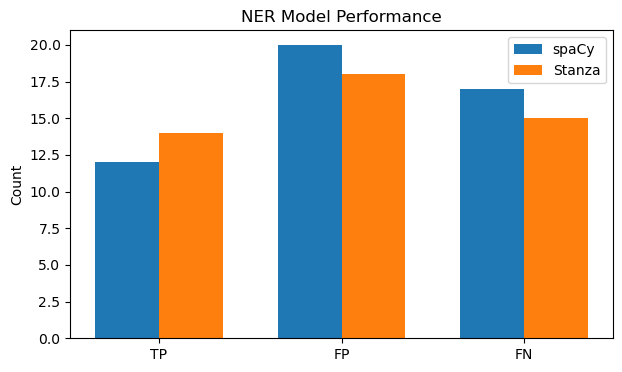

In [55]:
import matplotlib.pyplot as plt

metrics = ['TP', 'FP', 'FN']
spacy_scores = [spacy_tp, spacy_fp, spacy_fn]
stanza_scores = [stanza_tp, stanza_fp, stanza_fn]

x = range(len(metrics))
plt.figure(figsize=(7,4))
plt.bar(x, spacy_scores, width=0.35, label='spaCy', align='center')
plt.bar([i + 0.35 for i in x], stanza_scores, width=0.35, label='Stanza', align='center')
plt.xticks([i + 0.175 for i in x], metrics)
plt.ylabel('Count')
plt.title('NER Model Performance')
plt.legend()
plt.show()

NER Model performance visualized

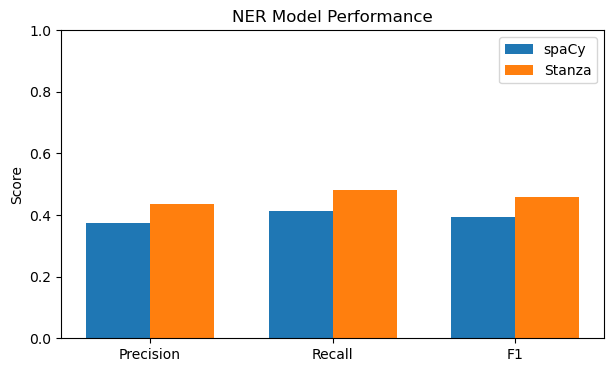

In [56]:
metrics = ['Precision', 'Recall', 'F1']
spacy_scores = [spacy_prec, spacy_rec, spacy_f1]
stanza_scores = [stanza_prec, stanza_rec, stanza_f1]

x = range(len(metrics))
plt.figure(figsize=(7,4))
plt.bar(x, spacy_scores, width=0.35, label='spaCy', align='center')
plt.bar([i + 0.35 for i in x], stanza_scores, width=0.35, label='Stanza', align='center')
plt.xticks([i + 0.175 for i in x], metrics)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('NER Model Performance')
plt.legend()
plt.show()